In [7]:
%load_ext autoreload
%autoreload complete
%load_ext jupyter_black

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The jupyter_black extension is already loaded. To reload it, use:
  %reload_ext jupyter_black


In [8]:
import pandas as pd
import numpy as np

%matplotlib inline
import seaborn as sns

In [9]:
import sys

sys.path.append("../neurometry/rep_metrics/")

from benchmarks import NSDBenchmark

benchmark = NSDBenchmark()

Now loading the shared1000 image set and the OTC-only voxel set...


In [10]:
sys.path.append("../neurometry/rep_metrics/")

from benchmarks import NSDBenchmark

benchmark = NSDBenchmark()

target_regions = ["EVC", "OTC"]

combined_response_data = []
combined_metadata = []

for region in target_regions:
    benchmark = NSDBenchmark(*f"shared1000_{region}-only".split("_"))

    response_data = benchmark.response_data.copy()
    voxel_metadata = benchmark.metadata.copy()

    voxel_metadata = voxel_metadata[["subj_id", "ncsnr"]]
    voxel_metadata["region"] = region

    combined_response_data.append(response_data)
    combined_metadata.append(voxel_metadata)

response_data = pd.concat(combined_response_data)
voxel_metadata = pd.concat(combined_metadata)

Now loading the shared1000 image set and the OTC-only voxel set...
Now loading the shared1000 image set and the EVC-only voxel set...
Now loading the shared1000 image set and the OTC-only voxel set...


In [13]:
response_data

,584,605,625,650,1308,1625,1877,2270,2349,2372,...,575701,575971,576011,576749,576789,577817,577964,578169,579906,580813
voxel_id,,,,,,,,,,,,,,,,,,,,,
S1-22-11-34,0.752486,-0.297966,-0.108485,0.027122,0.574349,-0.922022,0.244273,-0.129998,-0.156549,-0.097647,...,0.811811,0.334647,0.576700,-0.051925,0.960291,1.350665,0.745355,-0.587113,-1.248250,-0.684790
S1-22-11-35,-0.103754,0.244961,0.504785,-0.929686,-1.126533,-0.101796,-0.451838,-1.169137,-0.005067,0.310044,...,1.485696,0.213420,1.042587,-0.898903,-0.055290,0.927589,0.634646,0.320112,0.194043,-1.279413
S1-22-12-33,-0.569562,0.082608,0.327680,0.350439,-0.775774,-0.040204,-0.336788,-0.033517,0.059881,0.033386,...,-0.042141,0.052800,0.480060,0.420772,0.358667,0.415686,0.425214,0.281323,-0.422511,-0.626106
S1-23-10-33,0.802062,0.366396,-0.060212,0.717037,-0.578445,0.318957,0.177282,-0.390726,0.566761,0.003886,...,-0.649402,-0.205219,-0.324081,0.658013,0.643523,0.038668,0.335630,-0.877173,-1.218459,-0.321058
S1-23-10-34,0.267148,-0.457386,1.764591,-0.621412,0.296390,-0.758162,-0.369534,-0.403290,-0.816647,-0.263991,...,1.237165,0.443143,1.142742,-0.467000,0.029254,0.263533,0.857254,0.607774,-0.189726,-1.609570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S7-69-32-38,1.130066,0.006191,0.376372,-0.455574,0.440266,0.575219,-0.120470,-0.248187,-0.456935,0.735229,...,0.499937,-0.639836,-0.054146,-1.270271,-0.360737,-0.090973,0.476141,0.752159,0.516169,0.215909
S7-69-33-38,0.673119,-0.416937,0.267630,-0.422334,0.242033,0.897931,-0.312662,-0.000164,-0.645848,1.020198,...,-0.035872,-0.621331,-0.497352,-1.031812,-0.735381,-0.246403,0.099670,0.556312,-0.195499,0.151886
S7-70-30-35,-0.006916,-0.573220,-0.157642,-0.491851,-0.129971,0.350027,-0.010525,0.686783,-0.322118,-0.335977,...,-0.134072,0.372169,0.267758,-0.763398,-0.043041,0.278724,0.562701,0.707465,-0.865610,0.369399


### Reliability (NCSNR) Mapping

In [14]:
import nibabel as nib
import cortex  # pycortex

nsd_path = "/scratch/facosta/NSD"


def get_subj_dims(subj):
    fn = f"{nsd_path}/nsddata/ppdata/{subj}/func1pt8mm/mean.nii.gz"
    return nib.load(fn).get_fdata().shape

In [15]:
subj = "subj01"
space = "func1pt8mm"
xfm = "func1pt8_to_anat0pt8_autoFSbbr"
beta_version = "betas_fithrf_GLMdenoise_RR"

In [16]:
volumetric_data = np.zeros(get_subj_dims(subj))
volumetric_data[:] = np.nan

for row_i, row in benchmark.metadata.iterrows():
    subj_i, x, y, z = row.name.split("-")

    if f"subj0{subj_i[1]}" == subj:
        x, y, z = int(x), int(y), int(z)
        volumetric_data[x, y, z] = row.ncsnr

voxel_data = volumetric_data

In [17]:
from IPython.display import display
from io import BytesIO
from PIL import Image
import matplotlib as mpl
import matplotlib.pyplot as plt


def plot_ROI_flatmap(
    voxel_data,
    subj,
    mapper="nearest",
    rois=False,
    roi_labels=False,
    title=None,
    vmin=None,
    vmax=None,
    cmap="inferno",
    figsize=(20, 10),
    dpi=100,
    colorbar=True,
):
    voxel_data = np.swapaxes(voxel_data, 0, 2)
    plot_data = cortex.Volume(
        voxel_data,
        subj,
        cmap=cmap,
        vmin=vmin,
        vmax=vmax,
        xfmname="func1pt8_to_anat0pt8_autoFSbbr",
    )

    fig = plt.figure(figsize=figsize)

    cortex_handle = cortex.quickshow(
        plot_data,
        fig=fig,
        dpi=dpi,
        recache=False,
        with_rois=rois,
        with_labels=roi_labels,
        with_curvature=True,
        curvature_contrast=0.1,
        curvature_brightness=0.9,
        with_colorbar=colorbar,
    )

    if title:
        plt.title(title)

    return plot_data, fig


def convert_figure_to_image(fig, dpi=300):
    buffer = BytesIO()
    fig.savefig(buffer, format="png", dpi=dpi)
    buffer.seek(0)

    # Load image from buffer; convert to RGB
    return Image.open(buffer).convert("RGB")

In [18]:
# assess min and max values to set the range
np.nanmin(voxel_data), np.nanmax(voxel_data)

(0.2001090049743652, 1.418752908706665)

/home/facosta/miniconda3/envs/neurometry/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/facosta/miniconda3/envs/neurometry/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


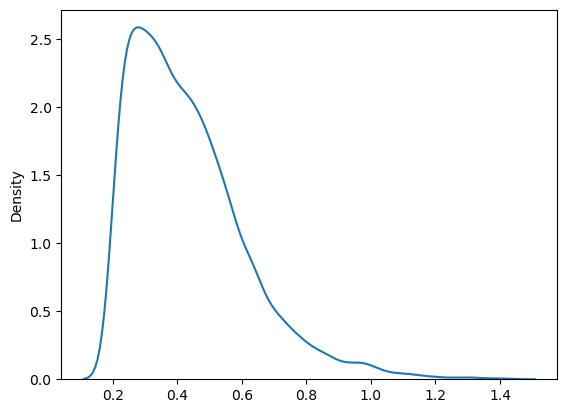

In [19]:
# overall distribution of NCSNR values
sns.kdeplot(voxel_data.flatten());

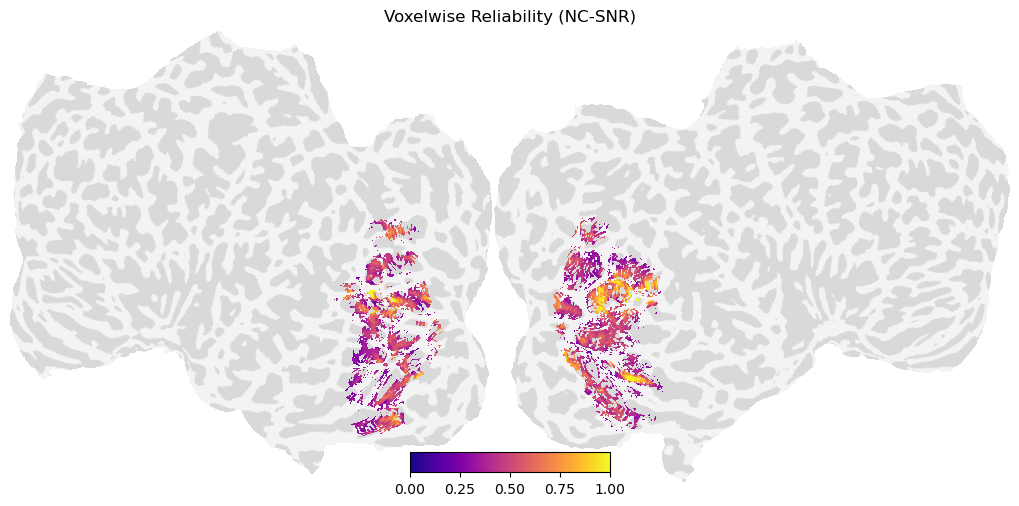

In [20]:
# Generate the plot_data and fig using plot_ROI_flatmap function
volume, fig = plot_ROI_flatmap(
    voxel_data,
    subj,
    figsize=(10, 5),
    cmap="plasma",
    vmin=0,
    vmax=1.0,  # rois = True,
    title="Voxelwise Reliability (NC-SNR)",
)

brain_plot = convert_figure_to_image(fig)